In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/reviews/reviews.csv


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [14]:
# Download necessary files from NLTK:
# punkt -> Tokenization
# stopwords -> Stop words removal
nltk.download("punkt")
nltk.download("stopwords")

# Load the reviews dataset and preview it
reviews = pd.read_csv("/kaggle/input/reviews/reviews.csv")
reviews.head()



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version (approx In...,1
3,"Used to keep me organized, but all the 2020 UP...",1
4,Dan Birthday Oct 28,1


In [15]:
# Step 1: Preprocess the negative reviews

# Filter negative reviews (having a score of 1 or 2)
negative_reviews_tmp = reviews[(reviews["score"] == 1) | (reviews["score"] == 2)]["content"]

def preprocess_text(text):
    """Performs all the required steps in the text preprocessing"""

    # Tokenizing the text
    tokens = word_tokenize(text)
    
    # Removing stop words and non-alpha characters
    filtered_tokens = [token for token in tokens if token.isalpha() and token.lower() not in stopwords.words("english")]
    
    return " ".join(filtered_tokens)


# Apply the preprocessing function to the negative reviews
negative_reviews_cleaned = negative_reviews_tmp.apply(preprocess_text)

# Store the preprocessed negative reviews in a pandas DataFrame
preprocessed_reviews = pd.DataFrame({"review": negative_reviews_cleaned})
preprocessed_reviews.head()


,review
0,open app anymore
1,begging refund app month nobody replying
2,costly premium version approx Indian Rupees pe...
3,Used keep organized UPDATES made mess things c...
4,Dan Birthday Oct


In [16]:
# Step 2: Vectorize the cleaned negative reviews using TF-IDF

# Vectorize the cleaned reviews using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_reviews["review"])

In [17]:
# Step 3: Apply K-means clustering to tfidf_matrix

# Apply K-means clustering (store the model as clust_kmeans)
clust_kmeans = KMeans(n_clusters=5, random_state=500)
pred_labels = clust_kmeans.fit_predict(tfidf_matrix)

# Store the predicted labels in a list variable called categories
categories = pred_labels.tolist()
preprocessed_reviews["category"] = categories


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Step 4: For each unique cluster label, find the most frequent term

# Get the feature names (terms) from the vectorizer
terms = vectorizer.get_feature_names_out()

# List to save the top term for each cluster
topic_terms_list = []

for cluster in range(clust_kmeans.n_clusters):
    # Get indices of reviews in the current cluster
    cluster_indices = [i for i, label in enumerate(categories) if label == cluster]

    # Sum the tf-idf scores for each term in the cluster
    cluster_tfidf_sum = tfidf_matrix[cluster_indices].sum(axis=0)
    cluster_term_freq = np.asarray(cluster_tfidf_sum).ravel()
    
    # Get the top term and its frequencies
    top_term_index = cluster_term_freq.argsort()[::-1][0]

    # Append rows to the topic_terms DataFrame with three fields:
    # - category: label / cluster assigned from K-means
    # - term: the identified top term
    # - frequency: term's weight for the category
    topic_terms_list.append(
    {
    "category": cluster,
    "term": terms[top_term_index],
    "frequency": cluster_term_freq[top_term_index],
    }
    )

# Pandas DataFrame to store results from this step
topic_terms = pd.DataFrame(topic_terms_list)

# Output the final result
print(topic_terms)

   category      term   frequency
0         0   version   61.620508
1         1   premium   65.863750
2         2       app  184.225204
3         3  calendar   69.281968
4         4      good   37.159921


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Insights:
   cluster  size                                       top_terms  \
0        0  2356                    [tasks, time, like, ca, use]   
1        1   334                  [version, free, pro, buy, app]   
2        2  1260                   [app, use, time, phone, like]   
3        3   206  [work, app, reminders, reminder, notification]   
4        4   128       [working, app, stopped, properly, widget]   
5        5   173               [account, create, app, sign, use]   
6        6    50                   [good, app, use, using, used]   
7        7   304              [calendar, google, sync, app, use]   
8        8    39             [bad, app, experience, alarm, vary]   

                                      sample_reviews  
0  [used keep organized updates made mess things ...  
1  [costly premium version approx indian rupees p...  
2  [open app anymore, begging refund app month no...  
3  [used work well earlier work junk, work, autof...  
4  [latest update working

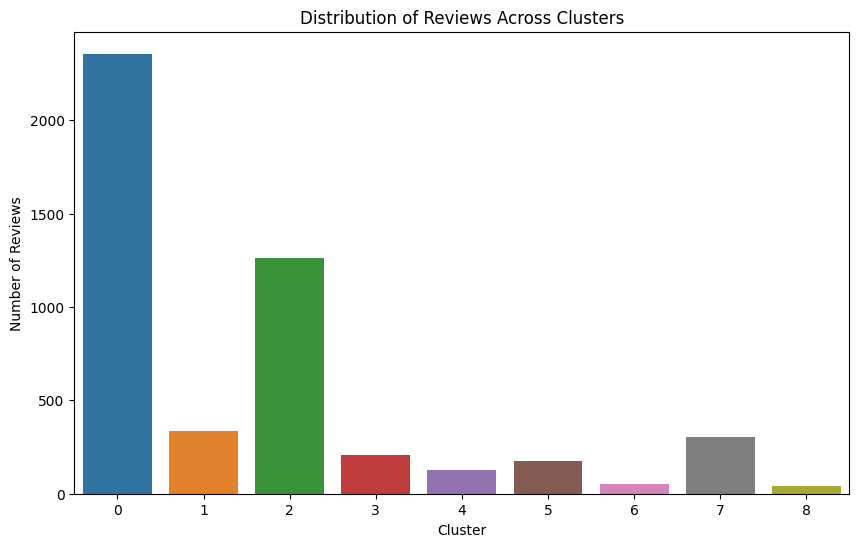

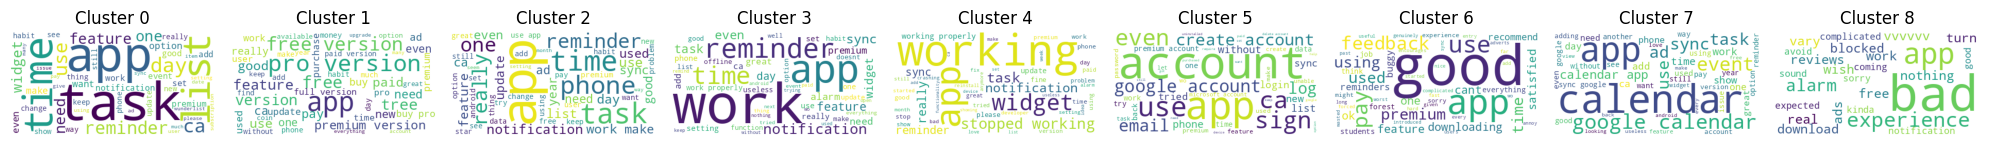

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

class ReviewAnalyzer:
    """A class to analyze app reviews using text preprocessing and clustering."""
    
    def __init__(self, filepath):
        """Initialize the analyzer with data filepath."""
        self.reviews = pd.read_csv(filepath)
        self.vectorizer = TfidfVectorizer()
        self.model = None
        self.preprocessed_reviews = None
        self.tfidf_matrix = None
        
    def preprocess_data(self, min_score=1, max_score=2):
        """
        Preprocess review text data.
        
        Args:
            min_score (int): Minimum review score to include
            max_score (int): Maximum review score to include
        """
        # Filter reviews by score
        mask = (self.reviews["score"] >= min_score) & (self.reviews["score"] <= max_score)
        filtered_reviews = self.reviews[mask]["content"]
        
        # Preprocess text
        processed = filtered_reviews.apply(self._preprocess_text)
        self.preprocessed_reviews = pd.DataFrame({"review": processed})
        
        # Vectorize text
        self.tfidf_matrix = self.vectorizer.fit_transform(self.preprocessed_reviews["review"])
        
    def _preprocess_text(self, text):
        """Clean and tokenize text."""
        try:
            tokens = word_tokenize(str(text))
            stop_words = set(stopwords.words("english"))
            tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
            return " ".join(tokens)
        except Exception as e:
            print(f"Error processing text: {e}")
            return ""

    def find_optimal_clusters(self, max_clusters=10):
        """Find optimal number of clusters using silhouette score."""
        scores = []
        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(self.tfidf_matrix)
            score = silhouette_score(self.tfidf_matrix, labels)
            scores.append(score)
        
        optimal_k = scores.index(max(scores)) + 2
        return optimal_k, scores

    def cluster_reviews(self, n_clusters=5):
        """Perform K-means clustering."""
        self.model = KMeans(n_clusters=n_clusters, random_state=42)
        self.preprocessed_reviews["cluster"] = self.model.fit_predict(self.tfidf_matrix)
        
    def get_cluster_insights(self):
        """Extract key terms and insights for each cluster."""
        terms = self.vectorizer.get_feature_names_out()
        insights = []
        
        for cluster in range(self.model.n_clusters):
            # Get cluster center
            center = self.model.cluster_centers_[cluster]
            # Get top terms
            top_indices = center.argsort()[-5:][::-1]
            top_terms = [terms[i] for i in top_indices]
            
            insights.append({
                "cluster": cluster,
                "size": sum(self.preprocessed_reviews["cluster"] == cluster),
                "top_terms": top_terms,
                "sample_reviews": self.preprocessed_reviews[self.preprocessed_reviews["cluster"] == cluster]["review"].head(3).tolist()
            })
            
        return pd.DataFrame(insights)

    def plot_cluster_distribution(self):
        """Plot distribution of reviews across clusters."""
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.preprocessed_reviews, x="cluster")
        plt.title("Distribution of Reviews Across Clusters")
        plt.xlabel("Cluster")
        plt.ylabel("Number of Reviews")
        plt.show()

    def generate_wordclouds(self):
        """Generate wordclouds for each cluster."""
        fig, axes = plt.subplots(1, self.model.n_clusters, figsize=(20, 4))
        
        for cluster in range(self.model.n_clusters):
            text = " ".join(self.preprocessed_reviews[self.preprocessed_reviews["cluster"] == cluster]["review"])
            wordcloud = WordCloud(background_color="white", max_words=50).generate(text)
            axes[cluster].imshow(wordcloud)
            axes[cluster].set_title(f"Cluster {cluster}")
            axes[cluster].axis("off")
        
        plt.tight_layout()
        plt.show()

# Example usage/kaggle/input/reviews/reviews.csv
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = ReviewAnalyzer("/kaggle/input/reviews/reviews.csv")
    
    # Preprocess data
    analyzer.preprocess_data()
    
    # Find optimal number of clusters
    optimal_k, silhouette_scores = analyzer.find_optimal_clusters()
    print(f"Optimal number of clusters: {optimal_k}")
    
    # Perform clustering
    analyzer.cluster_reviews(n_clusters=optimal_k)
    
    # Get insights
    insights = analyzer.get_cluster_insights()
    print("\nCluster Insights:")
    print(insights)
    
    # Generate visualizations
    analyzer.plot_cluster_distribution()
    analyzer.generate_wordclouds()

# 1. Import Required Libraries

In [28]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


# 2. Download NLTK Resources

In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 3.Define the ReviewAnalyzer Class

In [48]:


class ReviewAnalyzer:
    """A class to analyze app reviews using text preprocessing and clustering."""
    
    def __init__(self, filepath):
        """Initialize the analyzer with data filepath."""
        self.reviews = pd.read_csv(filepath)
        self.vectorizer = TfidfVectorizer()
        self.model = None
        self.preprocessed_reviews = None
        self.tfidf_matrix = None
    def _preprocess_text(self, text):
        """Clean and tokenize text."""
        try:
            tokens = word_tokenize(str(text))
            stop_words = set(stopwords.words("english"))
            tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
            return " ".join(tokens)
        except Exception as e:
            print(f"Error processing text: {e}")
            return ""   
   # Corrected method inside the ReviewAnalyzer class
    def preprocess_data(self, min_score=1, max_score=2):
        """
        Preprocess review text data.
    
        Args:
            min_score (int): Minimum review score to include
            max_score (int): Maximum review score to include
        """
        # Filter reviews by score
        mask = (self.reviews["score"] >= min_score) & (self.reviews["score"] <= max_score)
        filtered_reviews = self.reviews[mask]["content"]
    
        # Preprocess text
        processed = filtered_reviews.apply(self._preprocess_text)  # Use self to call the instance method
        self.preprocessed_reviews = pd.DataFrame({"review": processed})
    
        # Vectorize text
        self.tfidf_matrix = self.vectorizer.fit_transform(self.preprocessed_reviews["review"])


        #Finding the Optimal Number of Clusters
    def find_optimal_clusters(self, max_clusters=10):
        """Find optimal number of clusters using silhouette score."""
        scores = []
        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(self.tfidf_matrix)
            score = silhouette_score(self.tfidf_matrix, labels)
            scores.append(score)
            optimal_k = scores.index(max(scores)) + 2
        return optimal_k, scores
        
        #Clustering the reviews 
    def cluster_reviews(self, n_clusters=5):
        """Perform K-means clustering."""
        self.model = KMeans(n_clusters=n_clusters, random_state=42)
        self.preprocessed_reviews["cluster"] = self.model.fit_predict(self.tfidf_matrix)

        #Extract cluster insight 

    def get_cluster_insights(self):
        """Extract key terms and insights for each cluster."""
        terms = self.vectorizer.get_feature_names_out()
        insights = []
            
        for cluster in range(self.model.n_clusters):
            # Get cluster center
            center = self.model.cluster_centers_[cluster]
            # Get top terms
            top_indices = center.argsort()[-5:][::-1]
            top_terms = [terms[i] for i in top_indices]
                
            insights.append({
                "cluster": cluster,
                "size": sum(self.preprocessed_reviews["cluster"] == cluster),
                "top_terms": top_terms,
                "sample_reviews": self.preprocessed_reviews[self.preprocessed_reviews["cluster"] == cluster]["review"].head(3).tolist()
                })
                
        return pd.DataFrame(insights)
        
    def plot_cluster_distribution(self):
        """Plot distribution of reviews across clusters."""
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.preprocessed_reviews, x="cluster")
        plt.title("Distribution of Reviews Across Clusters")
        plt.xlabel("Cluster")
        plt.ylabel("Number of Reviews")
        plt.show()
        
    def generate_wordcloud(self):
        """Generate single wordcloud for all reviews."""
        plt.figure(figsize=(10, 6))
        text = " ".join(self.preprocessed_reviews["review"])
        wordcloud = WordCloud(background_color="white", max_words=100, width=800, height=400).generate(text)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title("Review Topics Wordcloud")
        plt.show()

        

In [49]:
# Example usage
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = ReviewAnalyzer("/kaggle/input/reviews/reviews.csv")
    
    # Preprocess data
    analyzer.preprocess_data(1,2)
    


In [50]:
# Find optimal number of clusters
optimal_k, silhouette_scores = analyzer.find_optimal_clusters()
print(f"Optimal number of clusters: {optimal_k}")
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 9


In [51]:
# Perform clustering
analyzer.cluster_reviews(n_clusters=optimal_k)
    
    # Get insights
insights = analyzer.get_cluster_insights()
print("\nCluster Insights:")
print(insights)
    
   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Insights:
   cluster  size                                       top_terms  \
0        0  2356                    [tasks, time, like, ca, use]   
1        1   334                  [version, free, pro, buy, app]   
2        2  1260                   [app, use, time, phone, like]   
3        3   206  [work, app, reminders, reminder, notification]   
4        4   128       [working, app, stopped, properly, widget]   
5        5   173               [account, create, app, sign, use]   
6        6    50                   [good, app, use, using, used]   
7        7   304              [calendar, google, sync, app, use]   
8        8    39             [bad, app, experience, alarm, vary]   

                                      sample_reviews  
0  [used keep organized updates made mess things ...  
1  [costly premium version approx indian rupees p...  
2  [open app anymore, begging refund app month no...  
3  [used work well earlier work junk, work, autof...  
4  [latest update working

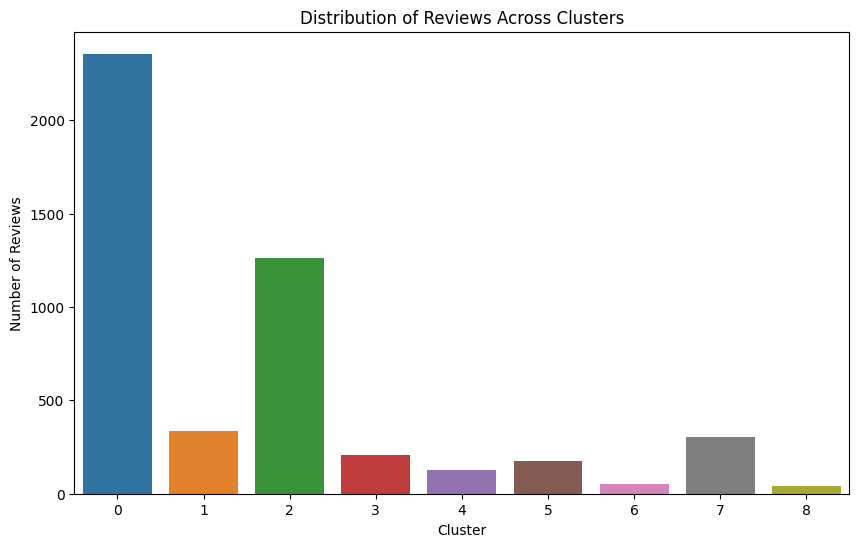

In [52]:
 # Generate visualizations
analyzer.plot_cluster_distribution()


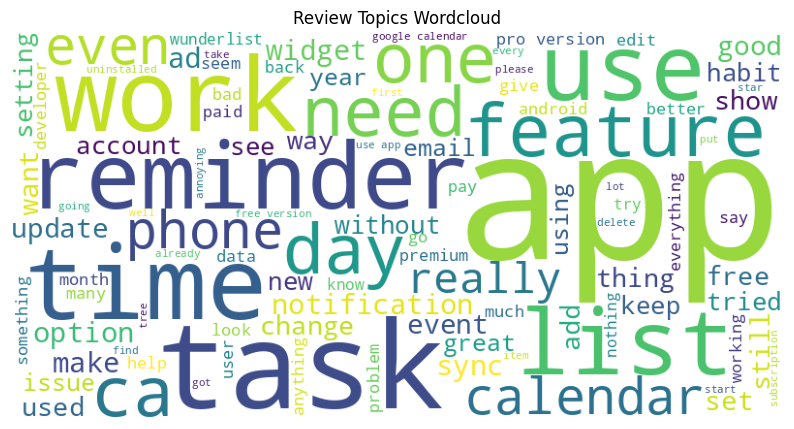

In [54]:
analyzer.generate_wordcloud()